 <span style="color: #4864c9; font-family: Babas; font-size: 2em;">Probabilities applied to a game of Tennis</span>

In a certain game of tennis, Alex has a "p" probability to win any given point against Blake. The player who gets to "n" points first wins the game, and points cannot end in a tie. What is the best description of Alex's probability to win the game?

General formula:

$p^n\sum_{k=0}^{n-1}\binom{k+n-1}{n-1}(1-p)^k$

For example, with a probability p = 60% and number of games n=4:

$(0.6)^4\sum_{k=0}^{3}\binom{k+3}{3}(0.4)^k$

In [40]:
#Pascal's Triangle (To Row 1000) for nchoosek in MATLAB
#n the number of points needed to win the game
#p One player's probability of winning a given point

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline






binom = {}
for n in range(0,1000):
        for k in range(0,n+1):
                if k == 0 or k == n:
                        binom[(n,k)] = 1
                else:
                        binom[(n,k)] = binom[(n-1,k)] + binom[(n-1,k-1)]

#Compute Win Probability
def prob(n,p):
        total = 0
        for x in range(0,n):
                total += ((1-p)**x) * binom[(n-1+x,x)]
        total *= (p**n)
        return total

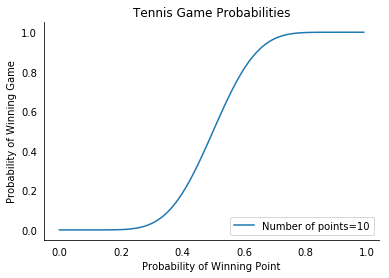

In [41]:
x=np.arange(0,100,1)/100

y=prob(10,x)



fig, ax = plt.subplots()
ax.plot(x,y,label='Number of points=10')
ax.tick_params(bottom="off", top="off", left="off", right="off")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Probability of Winning Point')
plt.ylabel('Probability of Winning Game')

ax.legend(loc='lower right')
ax.set_title('Tennis Game Probabilities')
plt.show()

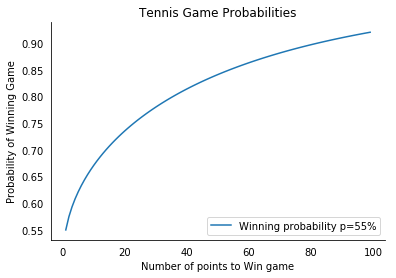

In [42]:
x2= list(range(1,100))
y2=[]
for i in x2:
    #print(i)
    y2.append(prob(i,0.55))



fig, ax = plt.subplots()
ax.plot(x2,y2,label='Winning probability p=55%')
ax.tick_params(bottom="off", top="off", left="off", right="off")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Number of points to Win game')
plt.ylabel('Probability of Winning Game')

ax.legend(loc='lower right')
ax.set_title('Tennis Game Probabilities')
plt.show()

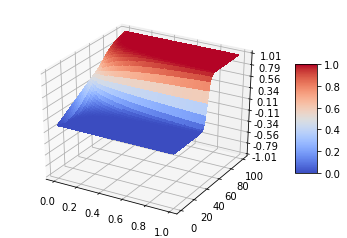

In [46]:
X=np.arange(0,100,1)/100
Y= list(range(1,101))

X,Y=np.meshgrid(X, Y)
M=X.shape[0]
N=Y.shape[1]


s=(M,N)
Z=np.zeros(s)

for i in range(M):
    for j in range(N):
        Z[i][j]=prob(Y[j][0],X[0][i])

fig = plt.figure()
ax = fig.gca(projection='3d')
        
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


